# What sells a car?

I'm an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on our site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [760]:
# Loading all the libraries

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [761]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv', sep=',')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [762]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [621]:
# print a sample of data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [622]:
data.duplicated().sum() #let's check duplicates

0

we can see that columns model_year can be int type. And is_4wd will be boolean, now it's float.
 also i decided that we need to around odometer and cylinders , so i will transfer it to int . The column date_posted we will transfer for datetime type.

We have missing values model_year, cylinders, odometer,paint_color,is_4wd have the most NaN. 

### Conclusions and further steps
We will fill missing values in columns model_year with mean of each model, for it we will create a categories like ford, bmw and other. We will fill values in cylinders,paint_color,is_4wd. In odometer we will left NaN because vehicle mileage is unpredictable,and does not depend on age of the car or its type.

## Treat missing values (if any)

In [623]:
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [624]:
data['model_year'].isna().sum()

3619

In [625]:
data['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

we will use extra column model_year1, copy of model_year for fill in missing values, because i think it's always good to see original data and have opportunities to compare its analysis,if required. And in the next steps i will do it with odometer, cylinders and is_4wd

In [629]:
data['model_year'] = data['model_year1'].fillna(data.groupby('model')['model_year1'].transform('median'))
data['model_year'].round()


0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [632]:
data['model_year'].isna().sum()

0

In [633]:
data['cylinders'].isna().sum()

5260

In [634]:
data[data.cylinders.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013.0
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44,2005.0
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2,2006.0
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25,2004.0
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,2018.0
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66,2007.0
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28,2007.0


In [635]:
print(data['cylinders'].unique())


[ 6.  4.  8. nan  5. 10.  3. 12.]


In [637]:
data['cylinders'] = data['cylinders'].fillna(data.groupby('model')['cylinders'].transform('median'))
data['cylinders']

0        6.0
1        6.0
2        4.0
3        8.0
4        4.0
        ... 
51520    6.0
51521    4.0
51522    4.0
51523    4.0
51524    4.0
Name: cylinders, Length: 51525, dtype: float64

In [640]:
data['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [641]:
data.loc[9]

price                  9200
model_year           2008.0
model           honda pilot
condition         excellent
cylinders               6.0
fuel                    gas
odometer           147191.0
transmission      automatic
type                    SUV
paint_color            blue
is_4wd                  1.0
date_posted      2019-02-15
days_listed              17
model_year1          2008.0
Name: 9, dtype: object

In [642]:
data['odometer'].isna().sum()

7892

In [643]:

data['odometer'] = data['odometer'].fillna(data.groupby('condition')['odometer'].transform('median'))
data['odometer']

0        145000.0
1         88705.0
2        110000.0
3        181613.0
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524    129000.0
Name: odometer, Length: 51525, dtype: float64

In [645]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1


In [647]:
data['paint_color'].isna().sum()

9267

In [648]:
data['paint_color']=data['paint_color'].fillna('unknown')
data['paint_color']

0        unknown
1          white
2            red
3        unknown
4          black
          ...   
51520      black
51521      white
51522       blue
51523      black
51524    unknown
Name: paint_color, Length: 51525, dtype: object

In [649]:
data['is_4wd'].isna().sum()

25953

In [508]:
data['is_4wd'].unique()#we have only 1 and NaN, so we can pretend that NaN is 0

array([ 1., nan])

In [652]:
data['is_4wd']=data['is_4wd'].fillna(0)
data['is_4wd']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

we added extra column model_year1, copy of model_year for fill in missing values, the same i did with odometer, cylinders and is_4wd, because i think it's always good to see original data and have opportunities to compare its analysis,if required. The NaN in'is_4wd_copy' i filled with 0, because it is logical to assume that we have only two option yes or now, 0 or 1, cylinders and model_year we added with media grouped by model, and and the odometer was filled by condition,although not always a bad condition can be associated with mileage.

## Fix data types

In [653]:
data = data.astype({"is_4wd": bool})#now we have 1 or 0 in column so we can transfer it to bool type
data['is_4wd']

0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool

In [654]:
data=data.astype({'model_year':int}) 
data['model_year']

0        2011
1        2011
2        2013
3        2003
4        2017
         ... 
51520    2013
51521    2002
51522    2009
51523    2013
51524    2014
Name: model_year, Length: 51525, dtype: int64

In [655]:
data=data.astype({'cylinders':int}) 
data['cylinders']

0        6
1        6
2        4
3        8
4        4
        ..
51520    6
51521    4
51522    4
51523    4
51524    4
Name: cylinders, Length: 51525, dtype: int64

In [656]:
data=data.astype({'odometer':int}) 
data['odometer']


0        145000
1         88705
2        110000
3        181613
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524    129000
Name: odometer, Length: 51525, dtype: int64

In [657]:
data.dtypes#now we will check the column date_posted and transfer it to datetime64


price             int64
model_year        int64
model            object
condition        object
cylinders         int64
fuel             object
odometer          int64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
model_year1     float64
dtype: object

In [658]:
data['date_posted']=pd.to_datetime(data['date_posted'])

In [659]:
data.dtypes#let's see now

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
model_year1            float64
dtype: object

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [660]:
data['month_posted']=pd.to_datetime(data['date_posted']).dt.month# Add datetime values for when the ad was placed

data['year_posted']=pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2011.0,6,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2013.0,2,2019
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2003.0,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019


In [661]:
#data['vehicle_age'] = data.apply(lambda row: row['year_posted']-row['model_year1'],axis=1 )
data['vehicle_age'] = (data['year_posted'] - data['model_year']).astype(int) + 1
data['vehicle_age']


0         8
1         8
2         7
3        17
4         3
         ..
51520     6
51521    17
51522    10
51523     6
51524     5
Name: vehicle_age, Length: 51525, dtype: int64

In [662]:
data[data['vehicle_age']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age


In [663]:
data['avg_mileage'] = data.apply(lambda row: row['odometer']/row['vehicle_age'] if row['vehicle_age']>0
                                       else row['odometer'], axis=1)
data['avg_mileage']# Add the vehicle's average mileage per year



0        18125.000000
1        11088.125000
2        15714.285714
3        10683.117647
4        26967.666667
             ...     
51520    14689.333333
51521    10676.470588
51522    12800.000000
51523    23262.166667
51524    25800.000000
Name: avg_mileage, Length: 51525, dtype: float64

In [664]:
try:
    data.insert(loc=1,column='condition_cat', value='yet_undiscovered')
except:
    print('already added the column condition_cat')  # It might help to replace the condition values with something that can be manipulated more easily




In [665]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [666]:
def condition_cat(condition):
    if 'new' in condition:
        return 5
    elif 'like new' in condition: 
        return 4
    elif 'excellent' in condition:
        return 3
    elif 'good' in condition:
        return 2
    elif 'fair' in condition:
        return 1
    else: return 0
# Create a column with the categories and count the values for them
data.loc[:,'condition_cat'] = data['condition'].apply(condition_cat)
data['condition_cat'].value_counts()

3    24773
2    20145
5     4885
1     1607
0      115
Name: condition_cat, dtype: int64

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [763]:
data.info()# print the general/summary information about the DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [669]:
data.head(10)# print a sample of data

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2011.0,6,2018,8,18125.000000
1,25500,2,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,10,2018,8,11088.125000
2,5500,5,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2013.0,2,2019,7,15714.285714
3,1500,1,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2003.0,3,2019,17,10683.117647
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
6,12990,3,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2015.0,12,2018,4,19803.000000
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
8,11500,3,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2012.0,7,2018,7,14882.000000
9,9200,3,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2008.0,2,2019,12,12265.916667


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'vehicle_age'}>],
       [<AxesSubplot:title={'center':'avg_mileage'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition_cat'}>, <AxesSubplot:>]],
      dtype=object)

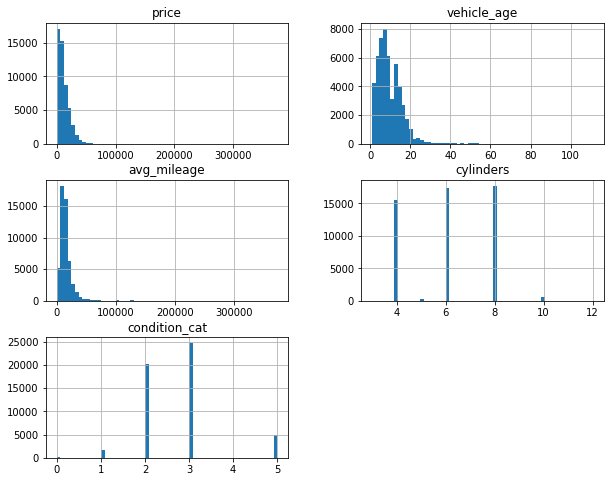

In [670]:
data.hist(column=['price', 'vehicle_age', 'avg_mileage', 'cylinders', 'condition_cat'], figsize=(10,8),bins=60)

In [671]:
print(data['price'].mean()>data['price'].median())
print()
print(data['price'].nunique())
print()
print(data['price'].value_counts(normalize=True))

True

3443

1        0.015488
6995     0.013954
5995     0.012712
4995     0.012111
3500     0.012033
           ...   
37873    0.000019
6197     0.000019
25647    0.000019
3138     0.000019
340      0.000019
Name: price, Length: 3443, dtype: float64


In [672]:
data['price'].describe().astype(int)

count     51525
mean      12132
std       10040
min           1
25%        5000
50%        9000
75%       16839
max      375000
Name: price, dtype: int64

In [673]:
data[data.price==data.price.max()]

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
12504,375000,2,1999,nissan frontier,good,6,gas,115000,automatic,pickup,blue,True,2018-05-19,21,1999.0,5,2018,20,5750.0


In [674]:
data[data.price==data.price.min()]

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
405,1,3,2014,chevrolet camaro,excellent,6,gas,71310,automatic,coupe,unknown,False,2018-07-14,29,2014.0,7,2018,5,14262.000000
3063,1,2,1998,chevrolet silverado,good,8,gas,164000,automatic,pickup,unknown,True,2018-10-11,49,1998.0,10,2018,21,7809.523810
3808,1,2,2007,chevrolet tahoe,good,8,gas,200,automatic,SUV,red,False,2019-03-18,63,2007.0,3,2019,13,15.384615
3902,1,1,1996,ford f-150,fair,8,gas,163000,manual,truck,white,False,2019-02-23,54,1996.0,2,2019,24,6791.666667
4140,1,3,2004,chevrolet silverado,excellent,8,diesel,83000,automatic,pickup,unknown,True,2019-02-04,14,2004.0,2,2019,16,5187.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,3,2007,chevrolet trailblazer,excellent,8,gas,104230,automatic,SUV,black,True,2018-08-06,28,2007.0,8,2018,12,8685.833333
49709,1,3,2010,ford f150,excellent,8,gas,139700,other,pickup,red,True,2019-03-11,18,NaN,3,2019,10,13970.000000
50245,1,2,1986,chevrolet silverado,good,8,gas,129000,automatic,truck,red,True,2018-11-30,50,1986.0,11,2018,33,3909.090909
50393,1,2,2003,gmc sierra 2500hd,good,8,diesel,212300,automatic,pickup,black,True,2019-04-12,28,2003.0,4,2019,17,12488.235294


## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [675]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='price'>

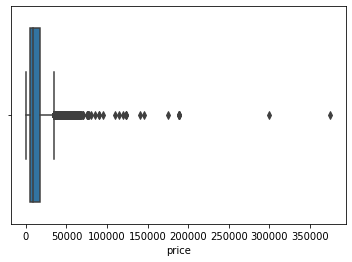

In [676]:
sns.boxplot(x=data['price'])


<AxesSubplot:xlabel='price'>

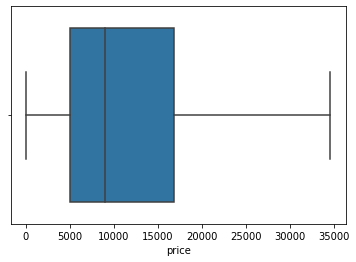

In [677]:
sns.boxplot(x=data['price'],showfliers = False)

In [678]:
Q1 = data['price'].quantile(0.25)#let's find min and max border after we check and saw boxplot
Q3 = data['price'].quantile(0.75)
print(Q1)
print(Q3)
IQR = Q3 - Q1
min_iqr=Q1-1.5*IQR
max_iqr=Q3+1.5*IQR
print('min border:',min_iqr)
print('max border:',max_iqr)

5000.0
16839.0
min border: -12758.5
max border: 34597.5


In [679]:
def distribution_IQR(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    Q1 = data[parameter].quantile(0.25)
    Q3 = data[parameter].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    print('---------------------------------------')
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print('---------------------------------------')
    if min_iqr<0:
        print('The outliers are considered to be values above',max_iqr)
        print('We have',len(data[data[parameter]>max_iqr]),"values that we can consider outliers")
    else:
        print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)
        print('We have',len(data[(data[parameter]<min_iqr)|(data[parameter]>max_iqr)]),"values that we can consider outliers")

The histogram of: price


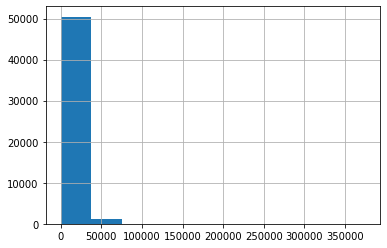

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: -12758.5
max border: 34597.5
---------------------------------------
The outliers are considered to be values above 34597.5
We have 1646 values that we can consider outliers


In [680]:
distribution_IQR('price')

In [681]:
def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist()
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    #data[parameter].describe()
    ninety_five = np.percentile(data[parameter], 95)
    five = np.percentile(data[parameter], 5)
    print('---------------------------------------')
    print('min border:',five)
    print('max border:',ninety_five)
    print('---------------------------------------')
    print('The outliers are considered to be values below',five, "and above",ninety_five)
    print('We have',len(data[(data[parameter]<five)|(data[parameter]>ninety_five)]),"values that we can consider outliers")

The histogram of: price


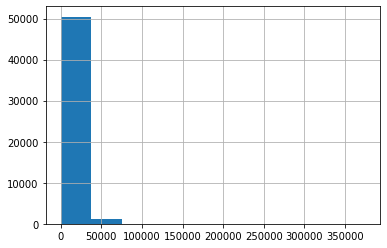

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1950.0
max border: 30300.0
---------------------------------------
The outliers are considered to be values below 1950.0 and above 30300.0
We have 5141 values that we can consider outliers


In [682]:
distribution_percentile('price')

## Study core parameters without outliers

In [683]:
def plot_hist_clean(parameter):
    data[(data[parameter] >= np.percentile(data[parameter], 5))
          &(data[parameter] <= np.percentile(data[parameter], 95))][parameter].hist()
    plt.show()

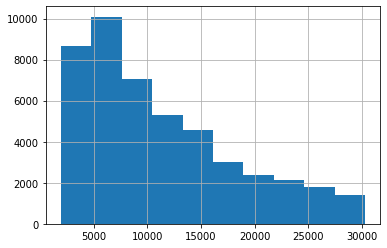

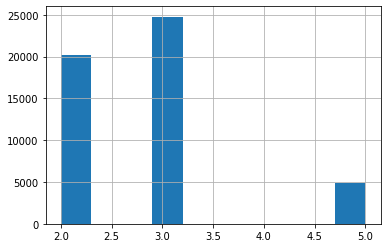

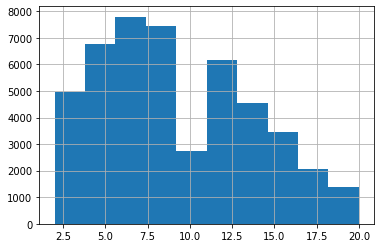

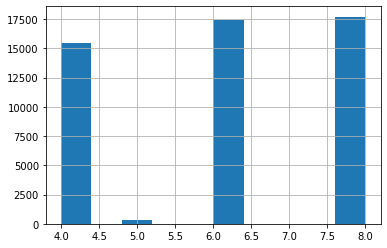

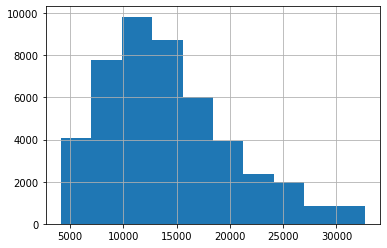

In [684]:
for parameter in ['price','condition_cat','vehicle_age','cylinders', 'avg_mileage']:
    plot_hist_clean(parameter)

In [685]:
border_list=[]
for parameter in ['price','condition_cat','vehicle_age','cylinders', 'avg_mileage']:
    ninety_five = np.percentile(data[parameter], 95)
    five = np.percentile(data[parameter], 5)
    border_list.append([parameter,five,ninety_five])


In [686]:
border_list

[['price', 1950.0, 30300.0],
 ['condition_cat', 2.0, 5.0],
 ['vehicle_age', 2.0, 20.0],
 ['cylinders', 4.0, 8.0],
 ['avg_mileage', 4136.994871794873, 32692.955555555545]]

In [687]:
border_data=pd.DataFrame(border_list,columns=['parameter','min_border','max_border'])
border_data

,parameter,min_border,max_border
0,price,1950.000000,30300.000000
1,condition_cat,2.000000,5.000000
2,vehicle_age,2.000000,20.000000
3,cylinders,4.000000,8.000000
4,avg_mileage,4136.994872,32692.955556


In [688]:
filter_1=(data['price']>np.percentile(data['price'], 5))&(data['price']<np.percentile(data['price'], 95))

In [689]:
filter_1

0         True
1         True
2         True
3        False
4         True
         ...  
51520     True
51521     True
51522     True
51523     True
51524     True
Name: price, Length: 51525, dtype: bool

In [690]:
data[filter_1]

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2011.0,6,2018,8,18125.000000
1,25500,2,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,10,2018,8,11088.125000
2,5500,5,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2013.0,2,2019,7,15714.285714
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,5,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2013.0,10,2018,6,14689.333333
51521,2700,0,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2002.0,11,2018,17,10676.470588
51522,3950,3,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2009.0,11,2018,10,12800.000000
51523,7455,2,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2013.0,7,2018,6,23262.166667


In [691]:
filter_data=data[filter_1]
filter_data

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2011.0,6,2018,8,18125.000000
1,25500,2,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,10,2018,8,11088.125000
2,5500,5,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2013.0,2,2019,7,15714.285714
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,5,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2013.0,10,2018,6,14689.333333
51521,2700,0,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2002.0,11,2018,17,10676.470588
51522,3950,3,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2009.0,11,2018,10,12800.000000
51523,7455,2,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2013.0,7,2018,6,23262.166667


In [692]:
filter_data=filter_data[(filter_data['condition_cat']>np.percentile(filter_data['condition_cat'], 5))&(filter_data['condition_cat']<np.percentile(filter_data['condition_cat'], 95))]
filter_data

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
6,12990,3,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2015.0,12,2018,4,19803.000000
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
8,11500,3,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2012.0,7,2018,7,14882.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51512,7300,3,2013,nissan altima,excellent,6,gas,7100,automatic,sedan,black,False,2018-06-17,63,2013.0,6,2018,6,1183.333333
51517,11000,3,2012,dodge charger,excellent,8,gas,81000,automatic,sedan,black,False,2019-04-19,44,2012.0,4,2019,8,10125.000000
51518,3750,3,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63,2005.0,8,2018,14,7871.428571
51519,11750,3,2015,honda accord,excellent,4,gas,104230,automatic,coupe,unknown,False,2018-11-24,89,2015.0,11,2018,4,26057.500000


In [693]:
filter_data=filter_data[(filter_data['vehicle_age']>np.percentile(filter_data['vehicle_age'], 5))&(filter_data['vehicle_age']<np.percentile(filter_data['vehicle_age'], 95))]
filter_data

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
6,12990,3,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2015.0,12,2018,4,19803.000000
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
8,11500,3,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2012.0,7,2018,7,14882.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51512,7300,3,2013,nissan altima,excellent,6,gas,7100,automatic,sedan,black,False,2018-06-17,63,2013.0,6,2018,6,1183.333333
51517,11000,3,2012,dodge charger,excellent,8,gas,81000,automatic,sedan,black,False,2019-04-19,44,2012.0,4,2019,8,10125.000000
51518,3750,3,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63,2005.0,8,2018,14,7871.428571
51519,11750,3,2015,honda accord,excellent,4,gas,104230,automatic,coupe,unknown,False,2018-11-24,89,2015.0,11,2018,4,26057.500000


In [695]:
filter_data=filter_data[(filter_data['cylinders']>np.percentile(filter_data['cylinders'], 5))&(filter_data['cylinders']<np.percentile(filter_data['cylinders'], 95))]
filter_data

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
5,14990,3,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2014.0,6,2018,5,11590.800000
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
9,9200,3,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2008.0,2,2019,12,12265.916667
17,13990,3,2014,jeep cherokee,excellent,6,gas,100669,automatic,SUV,red,True,2018-08-16,25,2014.0,8,2018,5,20133.800000
18,12500,3,2013,chevrolet traverse,excellent,6,gas,128325,automatic,SUV,white,True,2019-04-09,13,2013.0,4,2019,7,18332.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,4999,3,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unknown,True,2018-05-26,59,2002.0,5,2018,17,10464.764706
51500,6995,3,2012,buick enclave,excellent,6,gas,157000,automatic,SUV,white,True,2018-08-04,17,2012.0,8,2018,7,22428.571429
51508,4950,3,2010,chrysler town & country,excellent,6,gas,150000,automatic,mini-van,silver,False,2018-06-30,48,NaN,6,2018,9,16666.666667
51512,7300,3,2013,nissan altima,excellent,6,gas,7100,automatic,sedan,black,False,2018-06-17,63,2013.0,6,2018,6,1183.333333


In [696]:
filter_data.info()#let's check that we don't have the outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6874 entries, 5 to 51518
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          6874 non-null   int64         
 1   condition_cat  6874 non-null   int64         
 2   model_year     6874 non-null   int64         
 3   model          6874 non-null   object        
 4   condition      6874 non-null   object        
 5   cylinders      6874 non-null   int64         
 6   fuel           6874 non-null   object        
 7   odometer       6874 non-null   int64         
 8   transmission   6874 non-null   object        
 9   type           6874 non-null   object        
 10  paint_color    6874 non-null   object        
 11  is_4wd         6874 non-null   bool          
 12  date_posted    6874 non-null   datetime64[ns]
 13  days_listed    6874 non-null   int64         
 14  model_year1    6384 non-null   float64       
 15  month_posted   6874 

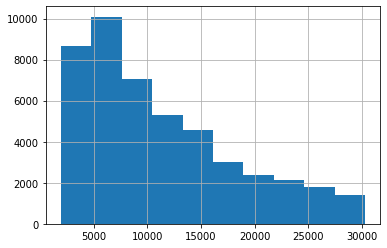

In [697]:
#REVIEWER CODE
def plot_hist_clean(parameter):
    data[(data[parameter] >= np.percentile(data[parameter], 5))&(data[parameter] <= np.percentile(data[parameter], 95))][parameter].hist()
    plt.show()

plot_hist_clean('price')

## Ads lifetime

In [698]:
filter_data['days_listed'].mean()

39.68766366016875

In [699]:
filter_data['days_listed'].median()

34.0

In [700]:
filter_data['days_listed'].describe()

count    6874.000000
mean       39.687664
std        27.886512
min         0.000000
25%        19.000000
50%        34.000000
75%        53.000000
max       256.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

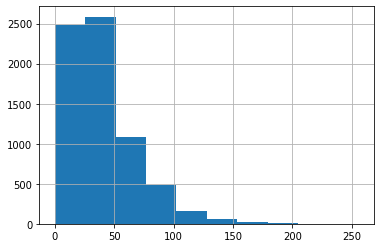

In [701]:
filter_data['days_listed'].hist()

In [702]:
five_ads = np.percentile(filter_data['days_listed'], 5)
five_ads

7.0

In [703]:
filt_ads=filter_data[filter_data['days_listed']<np.percentile(data['days_listed'], 5)]#look when ads were removed to fast
filt_ads

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
219,2800,3,2006,ford escape,excellent,6,gas,104230,automatic,SUV,white,False,2018-05-11,5,2006.0,5,2018,13,8017.692308
273,19900,3,2013,ford f-150,excellent,6,gas,79657,automatic,truck,silver,True,2019-03-01,4,2013.0,3,2019,7,11379.571429
337,5999,3,2007,chrysler 300,excellent,6,gas,122000,automatic,sedan,grey,False,2018-12-05,6,2007.0,12,2018,12,10166.666667
430,8995,3,2014,chevrolet equinox,excellent,6,gas,178490,automatic,SUV,silver,True,2019-01-10,6,2014.0,1,2019,6,29748.333333
478,26900,3,2015,toyota tacoma,excellent,6,gas,104230,automatic,pickup,silver,True,2018-05-08,4,2015.0,5,2018,4,26057.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50266,27000,3,2015,ram 2500,excellent,6,diesel,160000,other,truck,silver,True,2018-12-16,5,2015.0,12,2018,4,40000.000000
51123,4950,3,2007,volkswagen jetta,excellent,5,gas,81688,automatic,sedan,white,False,2018-11-19,6,2007.0,11,2018,12,6807.333333
51151,14990,3,2014,ford explorer,excellent,6,gas,118314,automatic,SUV,silver,True,2018-12-21,3,2014.0,12,2018,5,23662.800000
51340,17990,3,2016,gmc acadia,excellent,6,gas,62171,automatic,SUV,unknown,True,2019-03-09,5,2016.0,3,2019,4,15542.750000


In [704]:
filt_ads.corr()

,price,condition_cat,model_year,cylinders,odometer,is_4wd,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
price,1.000000,NaN,0.590378,0.141021,-0.309548,0.479838,-0.086567,0.620342,-0.081727,0.060466,-0.581471,0.277452
condition_cat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,0.590378,NaN,1.000000,0.062754,-0.343927,0.073208,-0.036934,1.000000,-0.105451,0.038902,-0.992621,0.518515
cylinders,0.141021,NaN,0.062754,1.000000,0.027968,0.131822,-0.097881,0.064798,0.026778,-0.026825,-0.065843,0.095286
odometer,-0.309548,NaN,-0.343927,0.027968,1.000000,-0.000825,0.047827,-0.360250,0.025823,-0.048261,0.337156,0.530722
is_4wd,0.479838,NaN,0.073208,0.131822,-0.000825,1.000000,-0.122125,0.091111,-0.019560,0.032403,-0.069081,0.110759
days_listed,-0.086567,NaN,-0.036934,-0.097881,0.047827,-0.122125,1.000000,-0.033436,0.046645,-0.047509,0.031070,0.015565
model_year1,0.620342,NaN,1.000000,0.064798,-0.360250,0.091111,-0.033436,1.000000,-0.119883,0.052169,-0.992819,0.518672
month_posted,-0.081727,NaN,-0.105451,0.026778,0.025823,-0.019560,0.046645,-0.119883,1.000000,-0.790952,0.009186,0.027004
year_posted,0.060466,NaN,0.038902,-0.026825,-0.048261,0.032403,-0.047509,0.052169,-0.790952,1.000000,0.082555,-0.112013


<AxesSubplot:xlabel='days_listed', ylabel='price'>

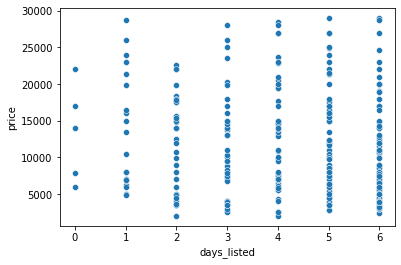

In [561]:
sns.scatterplot(data=filt_ads, x="days_listed", y="price")

<AxesSubplot:xlabel='days_listed', ylabel='model_year'>

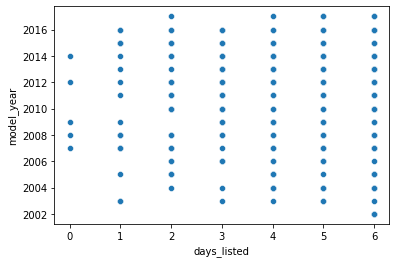

In [705]:
sns.scatterplot(data=filt_ads, x="days_listed", y="model_year")

<AxesSubplot:xlabel='days_listed', ylabel='odometer'>

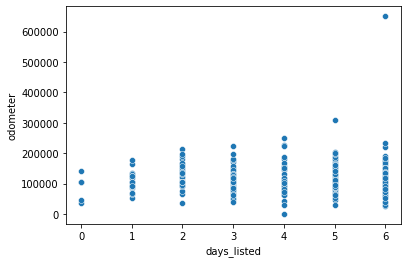

In [706]:
sns.scatterplot(data=filt_ads, x="days_listed", y="odometer")

<AxesSubplot:xlabel='days_listed', ylabel='model_year'>

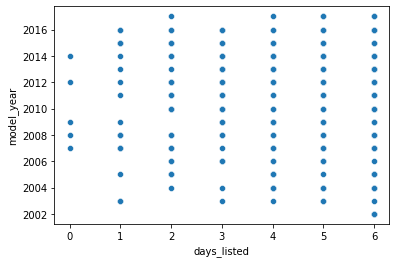

In [707]:
sns.scatterplot(data=filt_ads, x="days_listed", y="model_year")

In [708]:
ninetyfive_ads = np.percentile(filter_data['days_listed'], 95)
ninetyfive_ads

93.0

In [709]:
filt_ads1=filter_data[filter_data['days_listed']>np.percentile(data['days_listed'], 95)]#look when ads were removed to fast
filt_ads1

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
145,15995,3,2013,jeep wrangler,excellent,6,gas,138806,automatic,SUV,black,True,2018-09-08,112,2013.0,9,2018,6,23134.333333
572,13695,3,2011,chevrolet camaro,excellent,6,gas,124964,automatic,coupe,black,False,2019-02-25,110,2011.0,2,2019,9,13884.888889
594,7900,3,2008,toyota highlander,excellent,6,gas,114720,automatic,SUV,silver,False,2018-09-21,129,2008.0,9,2018,11,10429.090909
609,19900,3,2009,toyota sienna,excellent,6,gas,98000,automatic,mini-van,unknown,False,2018-06-14,96,2009.0,6,2018,10,9800.000000
878,13250,3,2008,toyota 4runner,excellent,6,gas,151668,automatic,SUV,black,True,2018-06-19,151,2008.0,6,2018,11,13788.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50613,23300,3,2016,chevrolet colorado,excellent,6,gas,7000,automatic,truck,silver,True,2018-08-15,107,2016.0,8,2018,3,2333.333333
50921,9995,3,2012,toyota tacoma,excellent,6,gas,172695,automatic,truck,grey,False,2018-09-19,162,2012.0,9,2018,7,24670.714286
50929,4950,3,2007,volkswagen jetta,excellent,5,gas,81688,automatic,sedan,white,False,2018-09-18,101,2007.0,9,2018,12,6807.333333
51287,7500,3,2008,chrysler town & country,excellent,6,gas,160000,automatic,mini-van,brown,False,2018-07-04,127,2008.0,7,2018,11,14545.454545


In [710]:
subset=data[(data['days_listed']>np.percentile(data['days_listed'], 5))&(data['price']<np.percentile(data['price'], 95))]
subset

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
0,9400,2,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2011.0,6,2018,8,18125.000000
1,25500,2,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,NaN,10,2018,8,11088.125000
2,5500,5,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2013.0,2,2019,7,15714.285714
3,1500,1,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2003.0,3,2019,17,10683.117647
4,14900,3,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2017.0,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,5,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,2013.0,10,2018,6,14689.333333
51521,2700,0,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,2002.0,11,2018,17,10676.470588
51522,3950,3,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,2009.0,11,2018,10,12800.000000
51523,7455,2,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,2013.0,7,2018,6,23262.166667


I added information with filtered data, without outliers. The typical time it's 33 days. We see in  filt_ads when ads were removed quickly, and infilt_ads1  when ads were listed for an abnormally long time. Also with graphics and corr() we can see that we don't have some special reason for it. In subset we can see the regular time of ads from 5% to 95%.

## Average price per each type of vehicle

In [711]:
print(filter_data.groupby('type')['price'].agg(['count','sum','mean']))
print()
print(filter_data['type'].value_counts())


             count       sum          mean
type                                      
SUV           2862  33823717  11818.209993
bus              1      7500   7500.000000
convertible     71    955064  13451.605634
coupe          243   2583750  10632.716049
hatchback        5     30594   6118.800000
mini-van       562   4880955   8684.973310
offroad         55   1116540  20300.727273
other           48    605940  12623.750000
pickup         675  11182499  16566.665185
sedan         1117   8267259   7401.306177
truck          903  15272579  16913.155039
van            146   1386410   9495.958904
wagon          186   2155776  11590.193548

SUV            2862
sedan          1117
truck           903
pickup          675
mini-van        562
coupe           243
wagon           186
van             146
convertible      71
offroad          55
other            48
hatchback         5
bus               1
Name: type, dtype: int64


In [712]:
types=filter_data.groupby(['type'])['price'].agg(['count','mean']).reset_index()
types

,type,count,mean
0,SUV,2862,11818.209993
1,bus,1,7500.000000
2,convertible,71,13451.605634
3,coupe,243,10632.716049
4,hatchback,5,6118.800000
5,mini-van,562,8684.973310
6,offroad,55,20300.727273
7,other,48,12623.750000
8,pickup,675,16566.665185
9,sedan,1117,7401.306177


In [713]:
types.sort_values(by='count',ascending=False)

,type,count,mean
0,SUV,2862,11818.209993
9,sedan,1117,7401.306177
10,truck,903,16913.155039
8,pickup,675,16566.665185
5,mini-van,562,8684.973310
3,coupe,243,10632.716049
12,wagon,186,11590.193548
11,van,146,9495.958904
2,convertible,71,13451.605634
6,offroad,55,20300.727273


In [714]:
types_groups=filter_data.groupby(['type'])['price'].nunique().reset_index().sort_values(by='price',ascending=False)
types_groups

,type,price
0,SUV,683
10,truck,343
9,sedan,316
8,pickup,293
5,mini-van,250
3,coupe,139
11,van,89
12,wagon,55
2,convertible,54
6,offroad,40


<AxesSubplot:xlabel='type', ylabel='price'>

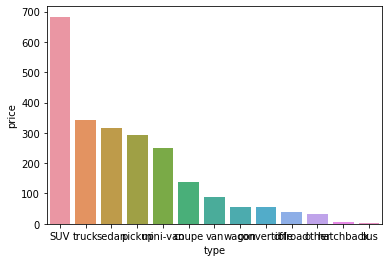

In [715]:
sns.barplot(x="type", y="price", data=types_groups)

In [716]:
top_types=list(types_groups.head(2)['type'])
top_types

['SUV', 'truck']

In [717]:
data_type=filter_data[filter_data.type.isin(top_types)]
data_type['type'].unique()

array(['SUV', 'truck'], dtype=object)

In [718]:
data_type['type'].value_counts()

SUV      2862
truck     903
Name: type, dtype: int64

We see that we have 'SUV' and 'truck' most popular type, and we have 2862ads of SUV and 903ads of truck what is bigger 50, so our analysis will be relevant .

In [719]:
print(filter_data.groupby('fuel')['price'].agg(['count','sum','mean']))
print()
print(filter_data['fuel'].value_counts())


          count       sum          mean
fuel                                   
diesel      296   6339007  21415.564189
electric      1      4400   4400.000000
gas        6566  75826670  11548.381054
hybrid        6     46431   7738.500000
other         5     52075  10415.000000

gas         6566
diesel       296
hybrid         6
other          5
electric       1
Name: fuel, dtype: int64


In [720]:
transmission=filter_data.groupby(['fuel'])['price'].agg(['count','mean']).reset_index()
transmission

,fuel,count,mean
0,diesel,296,21415.564189
1,electric,1,4400.000000
2,gas,6566,11548.381054
3,hybrid,6,7738.500000
4,other,5,10415.000000


In [721]:
transmission.sort_values(by='count',ascending=False)

,fuel,count,mean
2,gas,6566,11548.381054
0,diesel,296,21415.564189
3,hybrid,6,7738.500000
4,other,5,10415.000000
1,electric,1,4400.000000


In [722]:
transmission_groups=filter_data.groupby(['fuel'])['price'].nunique().reset_index().sort_values(by='price',ascending=False)
transmission_groups

,fuel,price
2,gas,1064
0,diesel,135
3,hybrid,6
4,other,4
1,electric,1


<AxesSubplot:xlabel='fuel', ylabel='price'>

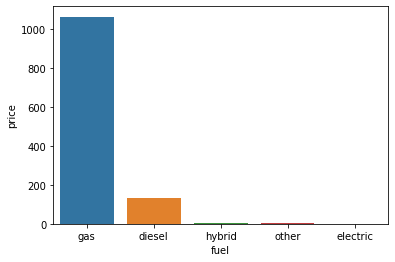

In [723]:
sns.barplot(x="fuel", y="price", data=transmission_groups)

In [724]:
top_transmission=list(transmission_groups.head(2)['fuel'])
top_transmission

['gas', 'diesel']

In [725]:
data_transmission=filter_data[filter_data.fuel.isin(top_transmission)]
data_transmission['fuel'].unique()

array(['gas', 'diesel'], dtype=object)

We see that we have categories gas, diesel, hyprid, other more than 50ads. and electric not relevant.

## Price factors

We can see that odometer and vehicle_age impact the prise most. condition, four-wheel drive and color almost no effect on pricing

In [726]:
Gaz=data_type[data_type['fuel']=='gas']
Gaz

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
9,9200,3,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2008.0,2,2019,12,12265.916667
17,13990,3,2014,jeep cherokee,excellent,6,gas,100669,automatic,SUV,red,True,2018-08-16,25,2014.0,8,2018,5,20133.800000
18,12500,3,2013,chevrolet traverse,excellent,6,gas,128325,automatic,SUV,white,True,2019-04-09,13,2013.0,4,2019,7,18332.142857
50,6200,3,2006,ford f-150,excellent,6,gas,69698,automatic,truck,custom,False,2018-05-03,50,2006.0,5,2018,13,5361.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51483,6499,3,2011,chevrolet traverse,excellent,6,gas,155903,automatic,SUV,grey,False,2018-08-18,34,2011.0,8,2018,8,19487.875000
51484,7999,3,2010,chevrolet traverse,excellent,6,gas,109363,automatic,SUV,unknown,False,2018-12-15,25,2010.0,12,2018,9,12151.444444
51494,7999,3,2009,chevrolet equinox,excellent,6,gas,95021,automatic,SUV,silver,True,2019-01-03,8,2009.0,1,2019,11,8638.272727
51496,4999,3,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unknown,True,2018-05-26,59,2002.0,5,2018,17,10464.764706


In [729]:
scat_gaz=Gaz[['price','condition','vehicle_age','avg_mileage','is_4wd','paint_color']]
scat_gaz

,price,condition,vehicle_age,avg_mileage,is_4wd,paint_color
7,15990,excellent,7,15639.000000,True,black
9,9200,excellent,12,12265.916667,True,blue
17,13990,excellent,5,20133.800000,True,red
18,12500,excellent,7,18332.142857,True,white
50,6200,excellent,13,5361.384615,False,custom
...,...,...,...,...,...,...
51483,6499,excellent,8,19487.875000,False,grey
51484,7999,excellent,9,12151.444444,False,unknown
51494,7999,excellent,11,8638.272727,True,silver
51496,4999,excellent,17,10464.764706,True,unknown


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


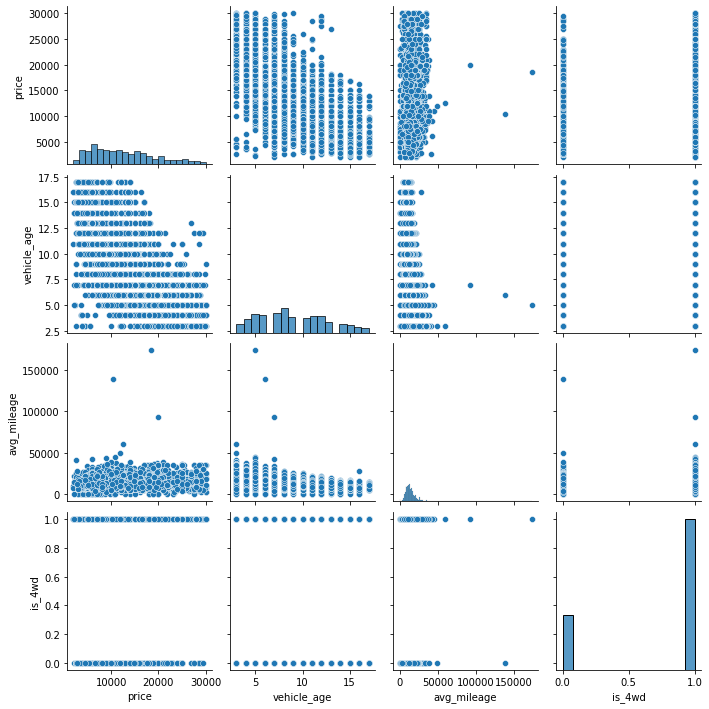

In [730]:
sns.pairplot(scat_gaz)

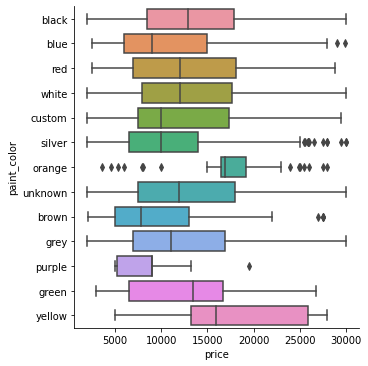

In [731]:
sns.catplot(data=scat_gaz, x="price", y="paint_color", kind="box")


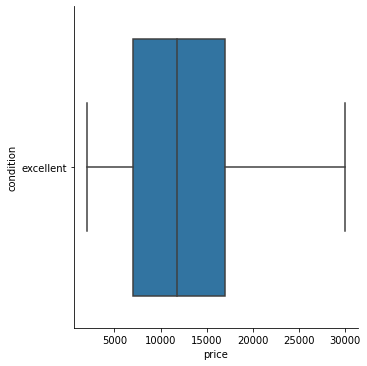

In [732]:
sns.catplot(data=scat_gaz, x="price", y="condition", kind="box")


In [733]:
scat_gaz.corr()

,price,vehicle_age,avg_mileage,is_4wd
price,1.000000,-0.639984,0.134128,0.251376
vehicle_age,-0.639984,1.000000,-0.484856,-0.050747
avg_mileage,0.134128,-0.484856,1.000000,0.010257
is_4wd,0.251376,-0.050747,0.010257,1.000000


In [734]:
Diesel=data_type[data_type['fuel']=='diesel']
Diesel

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
816,26900,3,2016,ram 2500,excellent,6,diesel,184800,automatic,truck,white,True,2018-12-25,55,2016.0,12,2018,3,61600.000000
1267,9995,3,2004,ram 2500,excellent,6,diesel,247152,manual,truck,white,False,2018-09-22,21,2004.0,9,2018,15,16476.800000
1674,17995,3,2006,ram 2500,excellent,6,diesel,179896,automatic,truck,silver,False,2018-05-22,91,2006.0,5,2018,13,13838.153846
1959,24900,3,2015,ram 1500,excellent,6,diesel,47153,automatic,truck,silver,False,2018-05-20,5,2015.0,5,2018,4,11788.250000
1966,26900,3,2016,ram 2500,excellent,6,diesel,184800,automatic,truck,white,True,2018-09-14,61,2016.0,9,2018,3,61600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50150,18995,3,2015,ram 2500,excellent,6,diesel,104230,automatic,truck,white,False,2018-07-28,11,2015.0,7,2018,4,26057.500000
50266,27000,3,2015,ram 2500,excellent,6,diesel,160000,other,truck,silver,True,2018-12-16,5,2015.0,12,2018,4,40000.000000
50648,18995,3,2012,ram 3500,excellent,6,diesel,297020,automatic,truck,unknown,True,2018-12-13,16,2012.0,12,2018,7,42431.428571
50653,18995,3,2004,ram 2500,excellent,6,diesel,200990,other,truck,white,True,2018-11-15,59,2004.0,11,2018,15,13399.333333


In [735]:
scat_dis=Diesel[['price','condition','vehicle_age','avg_mileage','is_4wd','paint_color']]
scat_dis

,price,condition,vehicle_age,avg_mileage,is_4wd,paint_color
816,26900,excellent,3,61600.000000,True,white
1267,9995,excellent,15,16476.800000,False,white
1674,17995,excellent,13,13838.153846,False,silver
1959,24900,excellent,4,11788.250000,False,silver
1966,26900,excellent,3,61600.000000,True,white
...,...,...,...,...,...,...
50150,18995,excellent,4,26057.500000,False,white
50266,27000,excellent,4,40000.000000,True,silver
50648,18995,excellent,7,42431.428571,True,unknown
50653,18995,excellent,15,13399.333333,True,white


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


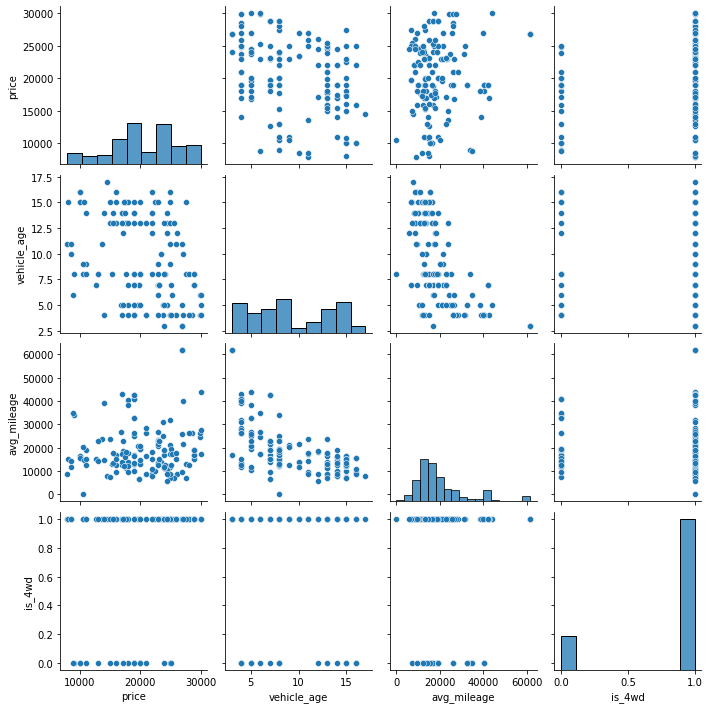

In [736]:
sns.pairplot(scat_dis)

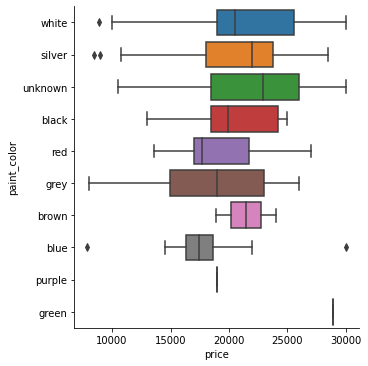

In [737]:
sns.catplot(data=scat_dis, x="price", y="paint_color", kind="box")


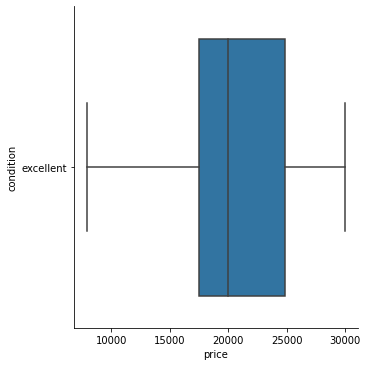

In [738]:
sns.catplot(data=scat_dis, x="price", y="condition", kind="box")


In [739]:
scat_dis.corr()

,price,vehicle_age,avg_mileage,is_4wd
price,1.000000,-0.369349,0.139455,0.293508
vehicle_age,-0.369349,1.000000,-0.622320,0.067680
avg_mileage,0.139455,-0.622320,1.000000,-0.092793
is_4wd,0.293508,0.067680,-0.092793,1.000000


In [740]:
suv=data_type[data_type['type']=='SUV']
suv

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
7,15990,3,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2013.0,1,2019,7,15639.000000
9,9200,3,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2008.0,2,2019,12,12265.916667
17,13990,3,2014,jeep cherokee,excellent,6,gas,100669,automatic,SUV,red,True,2018-08-16,25,2014.0,8,2018,5,20133.800000
18,12500,3,2013,chevrolet traverse,excellent,6,gas,128325,automatic,SUV,white,True,2019-04-09,13,2013.0,4,2019,7,18332.142857
56,4200,3,2006,jeep grand cherokee,excellent,6,gas,104230,automatic,SUV,white,True,2018-07-01,79,2006.0,7,2018,13,8017.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51483,6499,3,2011,chevrolet traverse,excellent,6,gas,155903,automatic,SUV,grey,False,2018-08-18,34,2011.0,8,2018,8,19487.875000
51484,7999,3,2010,chevrolet traverse,excellent,6,gas,109363,automatic,SUV,unknown,False,2018-12-15,25,2010.0,12,2018,9,12151.444444
51494,7999,3,2009,chevrolet equinox,excellent,6,gas,95021,automatic,SUV,silver,True,2019-01-03,8,2009.0,1,2019,11,8638.272727
51496,4999,3,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unknown,True,2018-05-26,59,2002.0,5,2018,17,10464.764706


In [747]:
scat_suv=suv[['price','condition','vehicle_age','avg_mileage','is_4wd','paint_color', 'cylinders']]
scat_suv

,price,condition,vehicle_age,avg_mileage,is_4wd,paint_color,cylinders
7,15990,excellent,7,15639.000000,True,black,6
9,9200,excellent,12,12265.916667,True,blue,6
17,13990,excellent,5,20133.800000,True,red,6
18,12500,excellent,7,18332.142857,True,white,6
56,4200,excellent,13,8017.692308,True,white,6
...,...,...,...,...,...,...,...
51483,6499,excellent,8,19487.875000,False,grey,6
51484,7999,excellent,9,12151.444444,False,unknown,6
51494,7999,excellent,11,8638.272727,True,silver,6
51496,4999,excellent,17,10464.764706,True,unknown,6


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


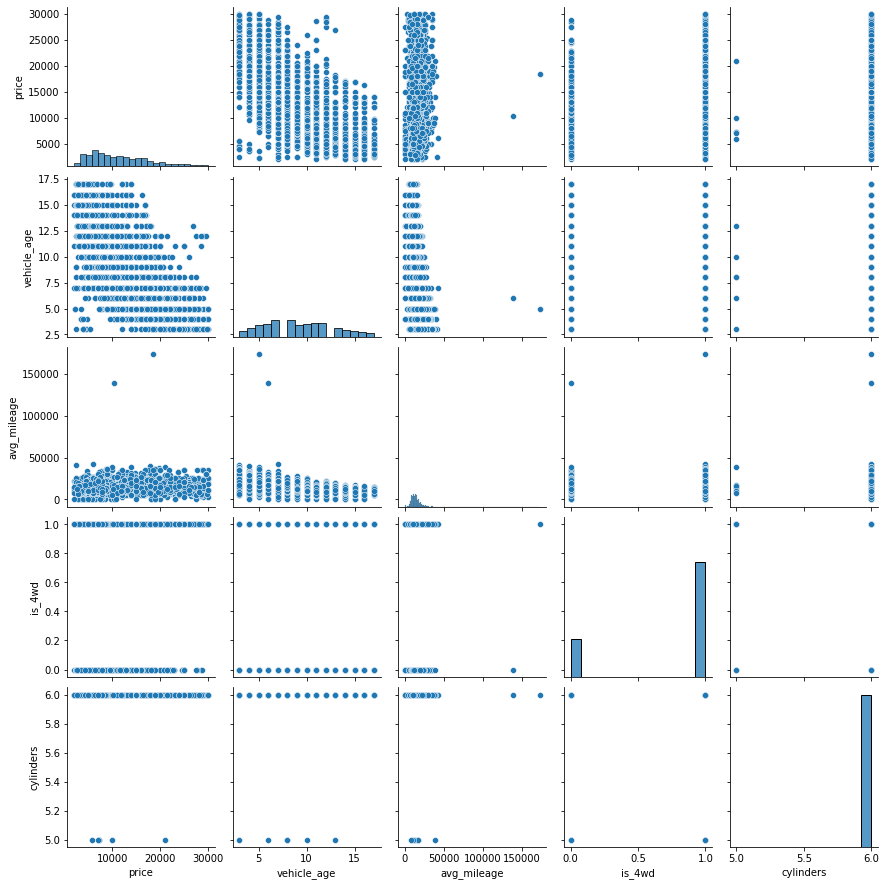

In [748]:
sns.pairplot(scat_suv)

In [749]:
scat_suv.corr()

,price,vehicle_age,avg_mileage,is_4wd,cylinders
price,1.000000,-0.616187,0.121513,0.241405,0.015000
vehicle_age,-0.616187,1.000000,-0.495382,-0.025223,0.015761
avg_mileage,0.121513,-0.495382,1.000000,-0.005586,-0.022338
is_4wd,0.241405,-0.025223,-0.005586,1.000000,0.009172
cylinders,0.015000,0.015761,-0.022338,0.009172,1.000000


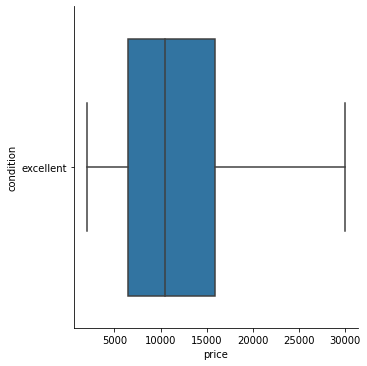

In [750]:
sns.catplot(data=scat_suv, x="price", y="condition", kind="box")


In [751]:
scat_suv['condition'].unique()

array(['excellent'], dtype=object)

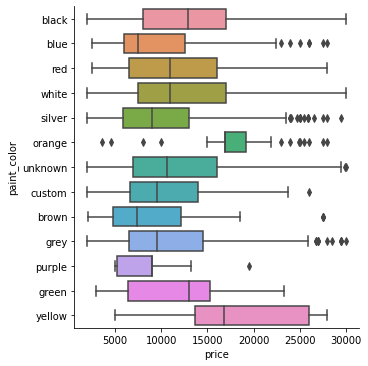

In [752]:
sns.catplot(data=scat_suv, x="price", y="paint_color", kind="box")


In [753]:
truck=data_type[data_type['type']=='truck']
truck

,price,condition_cat,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year1,month_posted,year_posted,vehicle_age,avg_mileage
50,6200,3,2006,ford f-150,excellent,6,gas,69698,automatic,truck,custom,False,2018-05-03,50,2006.0,5,2018,13,5361.384615
53,10400,3,2012,chevrolet colorado,excellent,5,gas,111871,automatic,truck,red,True,2019-01-30,27,2012.0,1,2019,8,13983.875000
102,10800,3,2015,chevrolet colorado,excellent,5,gas,114922,automatic,truck,red,True,2018-06-23,35,NaN,6,2018,4,28730.500000
187,15000,3,2009,toyota tacoma,excellent,6,gas,221000,automatic,truck,black,True,2019-02-20,30,2009.0,2,2019,11,20090.909091
205,19900,3,2013,ford f-150,excellent,6,gas,79657,automatic,truck,silver,True,2018-10-30,42,2013.0,10,2018,6,13276.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51158,24990,3,2016,ford f-150,excellent,6,gas,77851,automatic,truck,white,True,2018-06-24,40,2016.0,6,2018,3,25950.333333
51229,17750,3,2014,ford f-150,excellent,6,gas,108691,automatic,truck,white,True,2019-03-19,29,2014.0,3,2019,6,18115.166667
51299,11500,3,2014,ford f-150,excellent,6,gas,104230,automatic,truck,black,True,2019-04-04,48,2014.0,4,2019,6,17371.666667
51302,15900,3,2012,chevrolet colorado,excellent,5,gas,55555,automatic,truck,red,True,2019-01-24,37,2012.0,1,2019,8,6944.375000


In [754]:
scat_truck=truck[['price','condition','vehicle_age','avg_mileage','is_4wd','paint_color','cylinders']]
scat_truck

,price,condition,vehicle_age,avg_mileage,is_4wd,paint_color,cylinders
50,6200,excellent,13,5361.384615,False,custom,6
53,10400,excellent,8,13983.875000,True,red,5
102,10800,excellent,4,28730.500000,True,red,5
187,15000,excellent,11,20090.909091,True,black,6
205,19900,excellent,6,13276.166667,True,silver,6
...,...,...,...,...,...,...,...
51158,24990,excellent,3,25950.333333,True,white,6
51229,17750,excellent,6,18115.166667,True,white,6
51299,11500,excellent,6,17371.666667,True,black,6
51302,15900,excellent,8,6944.375000,True,red,5


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


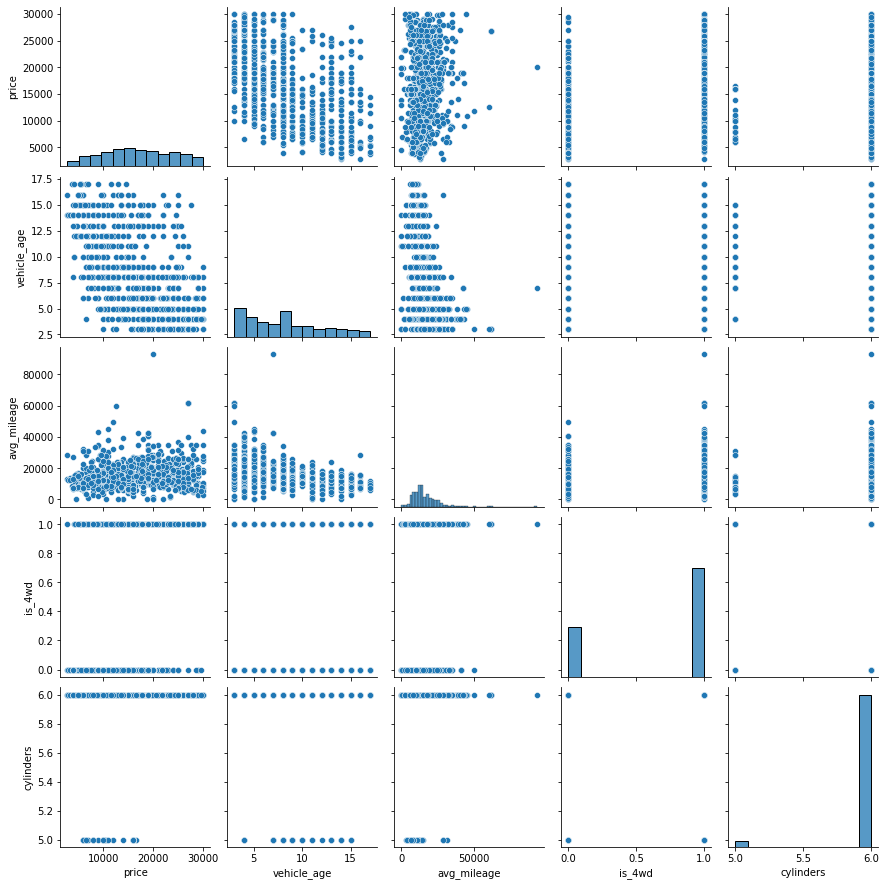

In [755]:
sns.pairplot(scat_truck)

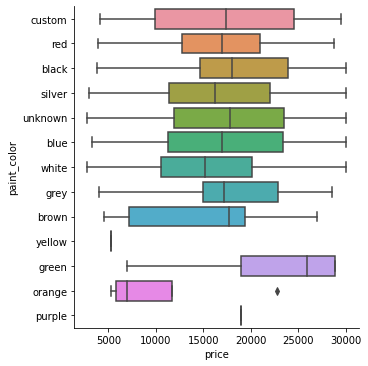

In [756]:
sns.catplot(data=scat_truck, x="price", y="paint_color", kind="box")


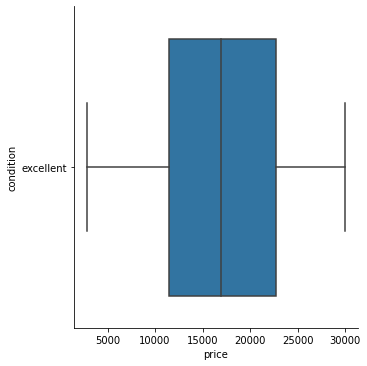

In [757]:
sns.catplot(data=scat_truck, x="price", y="condition", kind="box")


In [758]:
scat_truck['condition'].unique()

array(['excellent'], dtype=object)

In [759]:
scat_truck.corr()

,price,vehicle_age,avg_mileage,is_4wd,cylinders
price,1.000000,-0.560333,0.153942,0.427390,0.168200
vehicle_age,-0.560333,1.000000,-0.438254,-0.137460,-0.072597
avg_mileage,0.153942,-0.438254,1.000000,0.071975,0.109428
is_4wd,0.427390,-0.137460,0.071975,1.000000,-0.046275
cylinders,0.168200,-0.072597,0.109428,-0.046275,1.000000


## General conclusion
if we look at the correlation between vehicle type and price we see that we have most popular types suv and truck,we checked that there are more 50 ads, and we can explore those types. Both have only one condition - excelent. We see that vehicle_age affects its price the most. 4weel-drive comes the next reason for the height of the price and only after comes avg_mileage. For suv we see that yellow and orange the most expencive colors, For truck it is green and orange one of the low prices. We also can see on scatterplot and in corr() that vehicle_age and avg_mileage also influence each other, which is logical. 


I also checked two most popular types of transmission : gas and diesel, from it we can see that for Diesel is important vehicle_age, and type of 4wd. We can see that black and white most popular cars, and more expensive(but not much). The nost popular conditions for diesel its excellent , good and like new(what is expected, but strange that we don't have a lot of new). With gaz type we can see that condition has correlation with the price(the new has the highest). And the second thing that influence on our price in with gaz type is vehicle_age. Also we can see that yellow and orange color most expensive . We see that diesel is more durable.

From my research, I can conclude that the biggest factor is the age of the car, after 4weel drive will be with higher price than without, the condition may depend on the type of transmission.

We researched with histograms and distribution function the price, vehicle's age when the ad was placed,mileage,number of cylinders and condition(we categorized the data). Fixed data types and filed missing values. We saw data with outliers and without. Max.price with outliers is 375000, and without max_border is 30300.0,that looks realistic enough. We checked avrg.price for each type and also model. Figured out the regular number of days that the ad is on the site 33. With help of scatter graphs we can see interconnections of data.
